In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')


# **Helper codes for Preprocessing**


In [3]:
def fill_mean(key,train,test):
    train[key] = train[key].fillna(train[key].mean())
    test[key]  = test[key].fillna(train[key].mean())
    return train,test




def get_people_status(train_data):

    train_data['Status'] = train_data.apply(lambda x:'Sir.' if 'Sir.' in x.Name else 
        (
            'Mrs.' if 'Mrs. 'in x.Name
            else(
            'Mr.' if 'Mr. 'in x.Name
                else
                (
            'Dr.' if 'Dr. 'in x.Name
            else(

            'Kid' if x.Age<=10
            else(

            'Common Woman' if x.Sex=='female'
                else

        'Nobody.'))))),axis=1)
    
    train_data=train_data.drop(columns=['Name'])
    return train_data


def get_people_age_cat(train_data):

    train_data['Age_Group'] = train_data.apply(lambda x:'Infant' if x.Age<3 else 
        (
            'Small Children' if x.Age<12
            else(
            'Teenager' if x.Age<20
                else
                (
            'Youth' if x.Age<30
            else(

            'Middle Age' if x.Age<=50
            else
            'Senior')))),axis=1)
    
    train_data=train_data.drop(columns=['Age'])
    return train_data

# EDA

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age, Fare, Cabin columns have null values which needs to be addressed in the data

In [6]:
features = ['Age','Fare']
for key in features:
    train_data,test_data = fill_mean(key,train_data,test_data)

train_data['Cabin'] = train_data['Cabin'].fillna('No cabin')
test_data['Cabin'] = test_data['Cabin'].fillna('No cabin')


In [7]:
train_data.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

Even though name is useless, one can infer their title or status from this which is quite useful to determine the survival.

In [8]:
train_data['Cabin'].value_counts()

No cabin       687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E77              1
E40              1
C111             1
A6               1
B50              1
Name: Cabin, Length: 148, dtype: int64

More important here is the Alphabet of the cabin so we can discard the numbers and group all A,B, C.. together

In [9]:
train_data['Cabin']= train_data['Cabin'].str.slice(0,1)
test_data['Cabin']= test_data['Cabin'].str.slice(0,1)

In [10]:
train_data = get_people_status(train_data)
test_data = get_people_status(test_data)
train_data = get_people_age_cat(train_data)
test_data = get_people_age_cat(test_data)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Status', ylabel='count'>

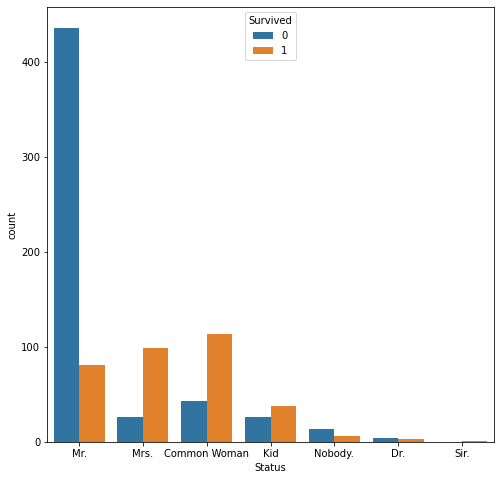

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(8,8))
sns.countplot(train_data['Status'],hue=train_data['Survived'])

<AxesSubplot:>

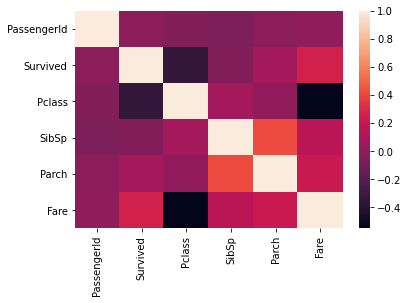

In [12]:
sns.heatmap(train_data.corr())

In [13]:
train_data.corr()['Fare']

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Name: Fare, dtype: float64

In [14]:
train_data = train_data.drop(columns=['PassengerId','Ticket','Fare'])
test_data = test_data.drop(columns=['Ticket','Fare'])

In [15]:
train_data

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Status,Age_Group
0,0,3,male,1,0,N,S,Mr.,Youth
1,1,1,female,1,0,C,C,Mrs.,Middle Age
2,1,3,female,0,0,N,S,Common Woman,Youth
3,1,1,female,1,0,C,S,Mrs.,Middle Age
4,0,3,male,0,0,N,S,Mr.,Middle Age
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,N,S,Nobody.,Youth
887,1,1,female,0,0,B,S,Common Woman,Teenager
888,0,3,female,1,2,N,S,Common Woman,Youth
889,1,1,male,0,0,C,C,Mr.,Youth


In [16]:
def split_columns(data):
    categorical_col = data.select_dtypes(include=['object','category']).columns.tolist()
    numerical_col = data.select_dtypes(include=['int64','float64']).columns.tolist()
    return categorical_col,numerical_col
    

In [17]:
cat,num = split_columns(train_data)
test = cat
test.append('Pclass')
test.append('SibSp')

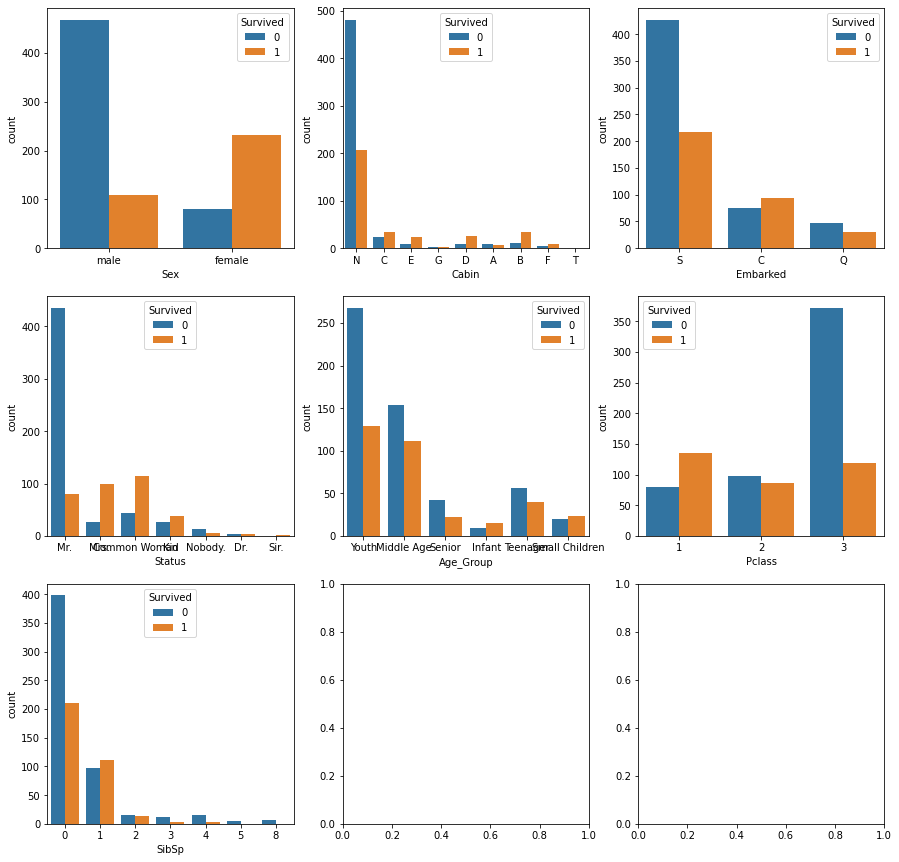

In [18]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(3,3,figsize=(15,15))
i=0;
for elem in cat:
    #print(elem)
    sns.countplot(x=train_data[elem], hue=train_data['Survived'], orient='v', ax=axes[int(i/3),(i%3)]);
    i=i+1
    

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

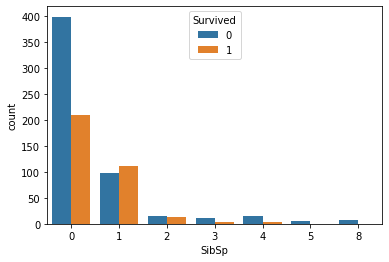

In [19]:
import seaborn as sns
sns.countplot(train_data['SibSp'],hue=train_data['Survived'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

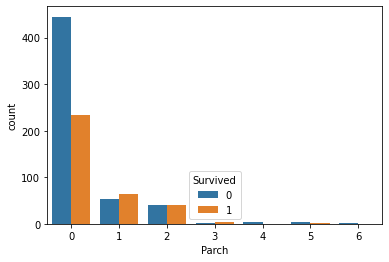

In [20]:
sns.countplot(train_data['Parch'],hue=train_data['Survived'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

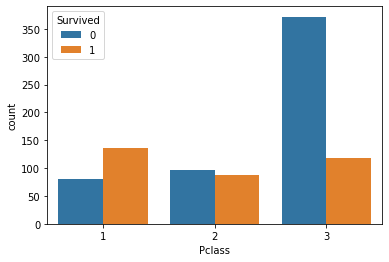

In [21]:
sns.countplot(train_data['Pclass'],hue=train_data['Survived'])

In [22]:
train_data = pd.get_dummies(train_data)

In [23]:
test_data = pd.get_dummies(test_data)

In [24]:
train_data = train_data.drop(columns=['Status_Sir.','Cabin_T'])

In [25]:
X_test = test_data.drop(columns=['PassengerId'])
y_train = train_data['Survived']
X_train = train_data.drop(columns=['Survived'])

In [26]:
X_train

,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Status_Kid,Status_Mr.,Status_Mrs.,Status_Nobody.,Age_Group_Infant,Age_Group_Middle Age,Age_Group_Senior,Age_Group_Small Children,Age_Group_Teenager,Age_Group_Youth
0,3,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,3,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
887,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
888,3,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,2,3,4,10,15],
     'min_samples_leaf': [3, 5,10,20,30],
     'min_samples_split': [4, 8, 10, 12],
     'n_estimators': [3,5,10,15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_



Fitting 3 folds for each of 480 candidates, totalling 1440 fits


{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 10}

In [28]:
rf =grid_search.best_estimator_
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


In [29]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [30]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('results.csv', index=False)